In [80]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


plt.style.use('ggplot')
data = pd.read_csv("./kaggle/dataset_malwares.csv")
data_test = pd.read_csv("./kaggle/dataset_test.csv")
data.head()

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624


#### 2. Проанализируйте датасет.
 Опишите его характеристики: имеющиеся колонки, размер. Преобразуйте датасет, приведя все данные к виду, пригодному для последующей обработки (колонки, содержащие дату и время, строковые некатегориальные значения и т.д.). Отобразите корреляционную матрицу. Предложите варианты по расширению датасета (то есть каким образом можно было бы собрать больше данных в исследуемой предметной области). 

In [81]:
print("Размер датасета:", data.shape)
print("Колонки датасета:", data.columns.tolist())
data.info()
print(data.describe())
print(data["TimeDateStamp"])
print(data["TimeDateStamp"].dtype)

Размер датасета: (19611, 79)
Колонки датасета: ['Name', 'e_magic', 'e_cblp', 'e_cp', 'e_crlc', 'e_cparhdr', 'e_minalloc', 'e_maxalloc', 'e_ss', 'e_sp', 'e_csum', 'e_ip', 'e_cs', 'e_lfarlc', 'e_ovno', 'e_oemid', 'e_oeminfo', 'e_lfanew', 'Machine', 'NumberOfSections', 'TimeDateStamp', 'PointerToSymbolTable', 'NumberOfSymbols', 'SizeOfOptionalHeader', 'Characteristics', 'Magic', 'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode', 'SizeOfInitializedData', 'SizeOfUninitializedData', 'AddressOfEntryPoint', 'BaseOfCode', 'ImageBase', 'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion', 'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion', 'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfHeaders', 'CheckSum', 'SizeOfImage', 'Subsystem', 'DllCharacteristics', 'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve', 'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'Malware', 'SuspiciousImportFunctions', 'SuspiciousNameSection', 'Sec

In [82]:
data.describe()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
count,19611.0,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.00000,19611.000000,...,1.961100e+04,19611.0,19611.000000,19611.000000,19611.000000,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04
mean,23117.0,178.615726,71.660752,49.146958,37.370710,37.032635,64178.739687,10.418490,226.46530,29.689103,...,3.163632e+09,0.0,6.112437,101.912804,14.131865,3.368566e+05,4.047213e+05,5.555810e+05,1.238834e+06,8.814868e+05
std,0.0,987.200729,1445.192977,1212.201919,864.515405,915.833139,9110.755873,637.116265,1249.68033,1015.303419,...,5.860332e+08,0.0,7.525158,127.076767,154.958102,2.181191e+07,4.704601e+06,6.772167e+06,5.868961e+07,2.167579e+07
min,23117.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1.073742e+09,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,2.000000,17.000000,0.000000,0.000000e+00,2.960400e+04,4.096000e+04,0.000000e+00,0.000000e+00
50%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,4.000000,80.000000,0.000000,0.000000e+00,8.222400e+04,1.310720e+05,0.000000e+00,0.000000e+00
75%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,8.000000,135.000000,0.000000,0.000000e+00,2.477080e+05,3.870720e+05,0.000000e+00,3.184640e+05
max,23117.0,59448.000000,63200.000000,64613.000000,43690.000000,43690.000000,65535.000000,61436.000000,65464.00000,63262.000000,...,4.294967e+09,0.0,588.000000,4016.000000,7319.000000,2.147484e+09,5.368914e+08,8.304108e+08,2.906159e+09,2.415919e+09


Преобразуйте датасет, приведя все данные к виду, пригодному для последующей обработки (колонки, содержащие дату и время, строковые некатегориальные значения и т.д.). Отобразите корреляционную матрицу

In [83]:
data['TimeDateStamp'] = pd.to_datetime(data['TimeDateStamp'], errors='coerce', unit='s')

In [84]:
print("Columns having only 1 unique Value")
drop_columns = ['Name', 'Malware', 'TimeDateStamp']
unique_columns = [col for col in data if data[col].nunique() == 1]
for col in unique_columns:
    drop_columns.append(col)
    
print(*drop_columns)
X_train=data.drop(drop_columns, axis=1)
Y_train=data['Malware']

Columns having only 1 unique Value
Name Malware TimeDateStamp e_magic SectionMaxEntropy SectionMaxRawsize SectionMaxVirtualsize SectionMinPhysical SectionMinVirtual SectionMinPointerData SectionMainChar


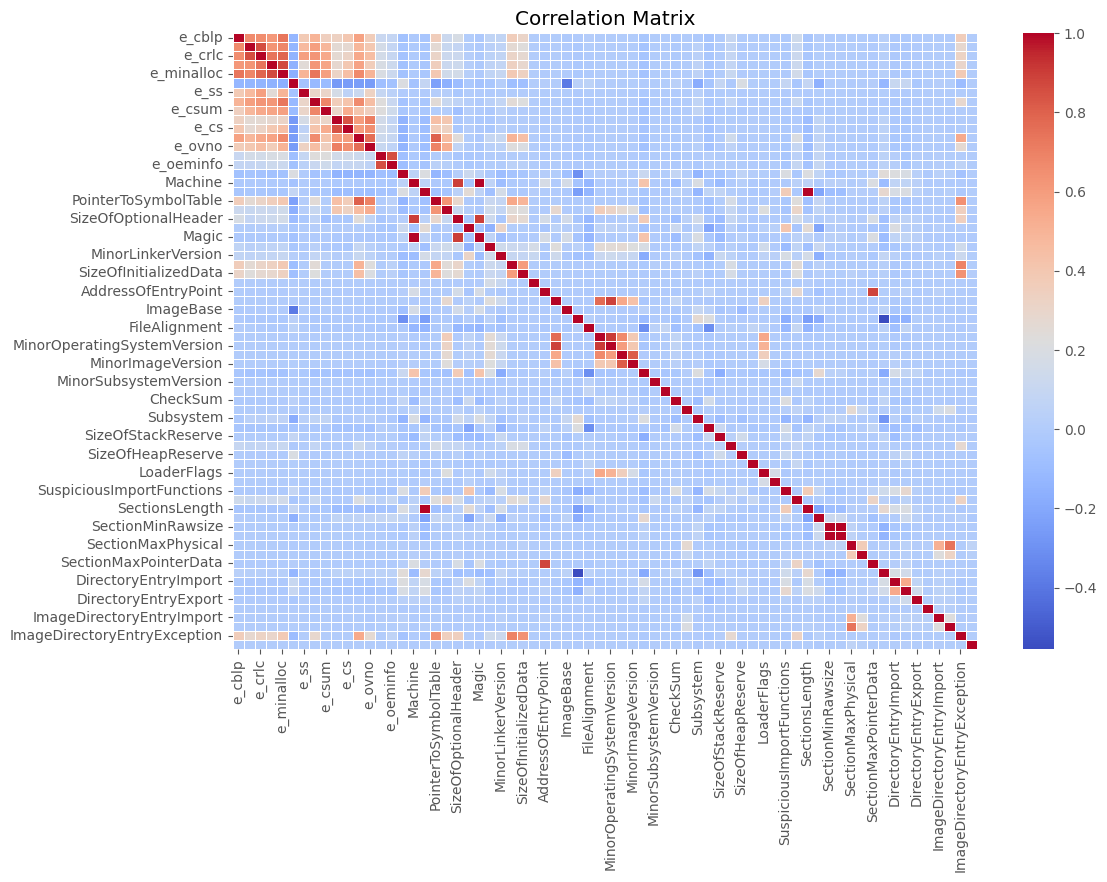

In [85]:
# Вычисление корреляции
corr_matrix = X_train.corr()

# Построение тепловой карты корреляций
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [86]:
high_corr_columns = ['e_cblp', 'e_minalloc', 'MajorOperatingSystemVersion', 'DirectoryEntryImportSize']

X_train=X_train.drop(high_corr_columns, axis=1)

seaborn.countplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, hue_norm=None, stat='count', width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', ax=None, **kwargs)

Show the counts of observations in each categorical bin using bars.

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot(), so you can compare counts across nested variables.

Note that histplot() function offers similar functionality with additional features (e.g. bar stacking), although its default behavior is somewhat different.

See the tutorial for more information.

[Text(0, 0, 'Benign'), Text(1, 0, 'Malware')]

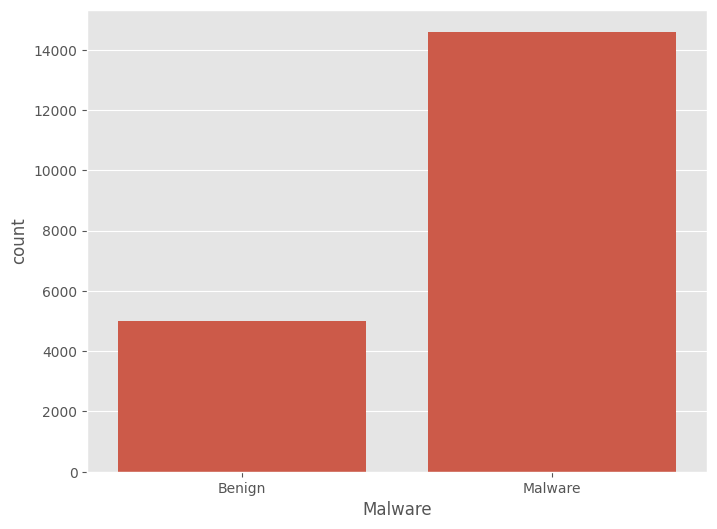

In [87]:
plt.figure(figsize=(8, 6))
ax=sns.countplot(x=data['Malware'])
ax.set_xticks([0, 1])
ax.set_xticklabels(['Benign', 'Malware'])

In [88]:
# features = ['MajorSubsystemVersion', 'MajorLinkerVersion', 'SizeOfCode', 'SizeOfImage', 'SizeOfHeaders', 'SizeOfInitializedData', 
#            'SizeOfUninitializedData', 'SizeOfStackReserve', 'SizeOfHeapReserve', 
#             'NumberOfSymbols', 'SectionMaxChar']

# i=1

# for feature in features:
#     plt.figure(figsize=(10, 15))
#     ax1 = plt.subplot(len(features), 2, i)
#     sns.histplot(data[data['Malware']==1][feature], ax=ax1, kde_kws={'bw': 0.1})
#     ax1.set_title(f'Malware', fontsize=10)
#     ax2 = plt.subplot(len(features), 2, i+1)
#     sns.histplot(data[data['Malware']==0][feature], ax=ax2, kde_kws={'bw': 0.1})
#     ax2.set_title(f'Benign', fontsize=10)
#     i= i+2

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=30)
# print(f'Number of used features is {X_train.shape[1]}')

In [90]:
X_train.shape

(15688, 64)

In [91]:
y_train.head()


8291     1
8265     1
8059     1
13116    1
10972    1
Name: Malware, dtype: int64

In [92]:
# X_test=data_test.drop([*drop_columns, *high_corr_columns], axis=1)
# Y_test = data_test['Malware']

In [93]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0, 
                         oob_score = True,
                         max_depth = 16)
# X_train.head()
# y_train.head()
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, oob_score=True, random_state=0)

In [95]:
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malware']))

              precision    recall  f1-score   support

      Benign       0.99      0.97      0.98      1021
     Malware       0.99      1.00      0.99      2902

    accuracy                           0.99      3923
   macro avg       0.99      0.98      0.99      3923
weighted avg       0.99      0.99      0.99      3923



Text(50.722222222222214, 0.5, 'True labels')

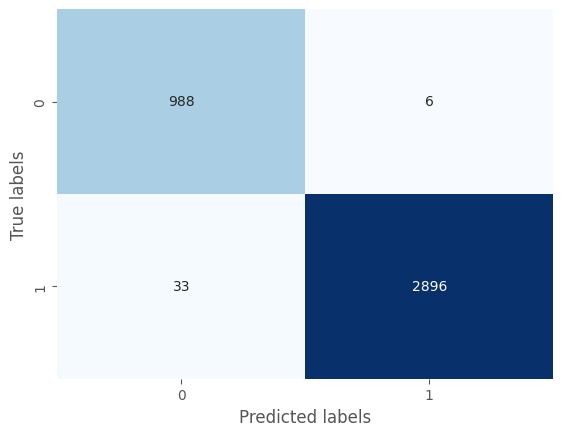

In [96]:
ax=sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

In [97]:
pkl_filename = "rf_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rfc, file)


/tmp/ipykernel_146087/1239190174.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], palette='mako')


Text(0.5, 1.0, 'Features importance')

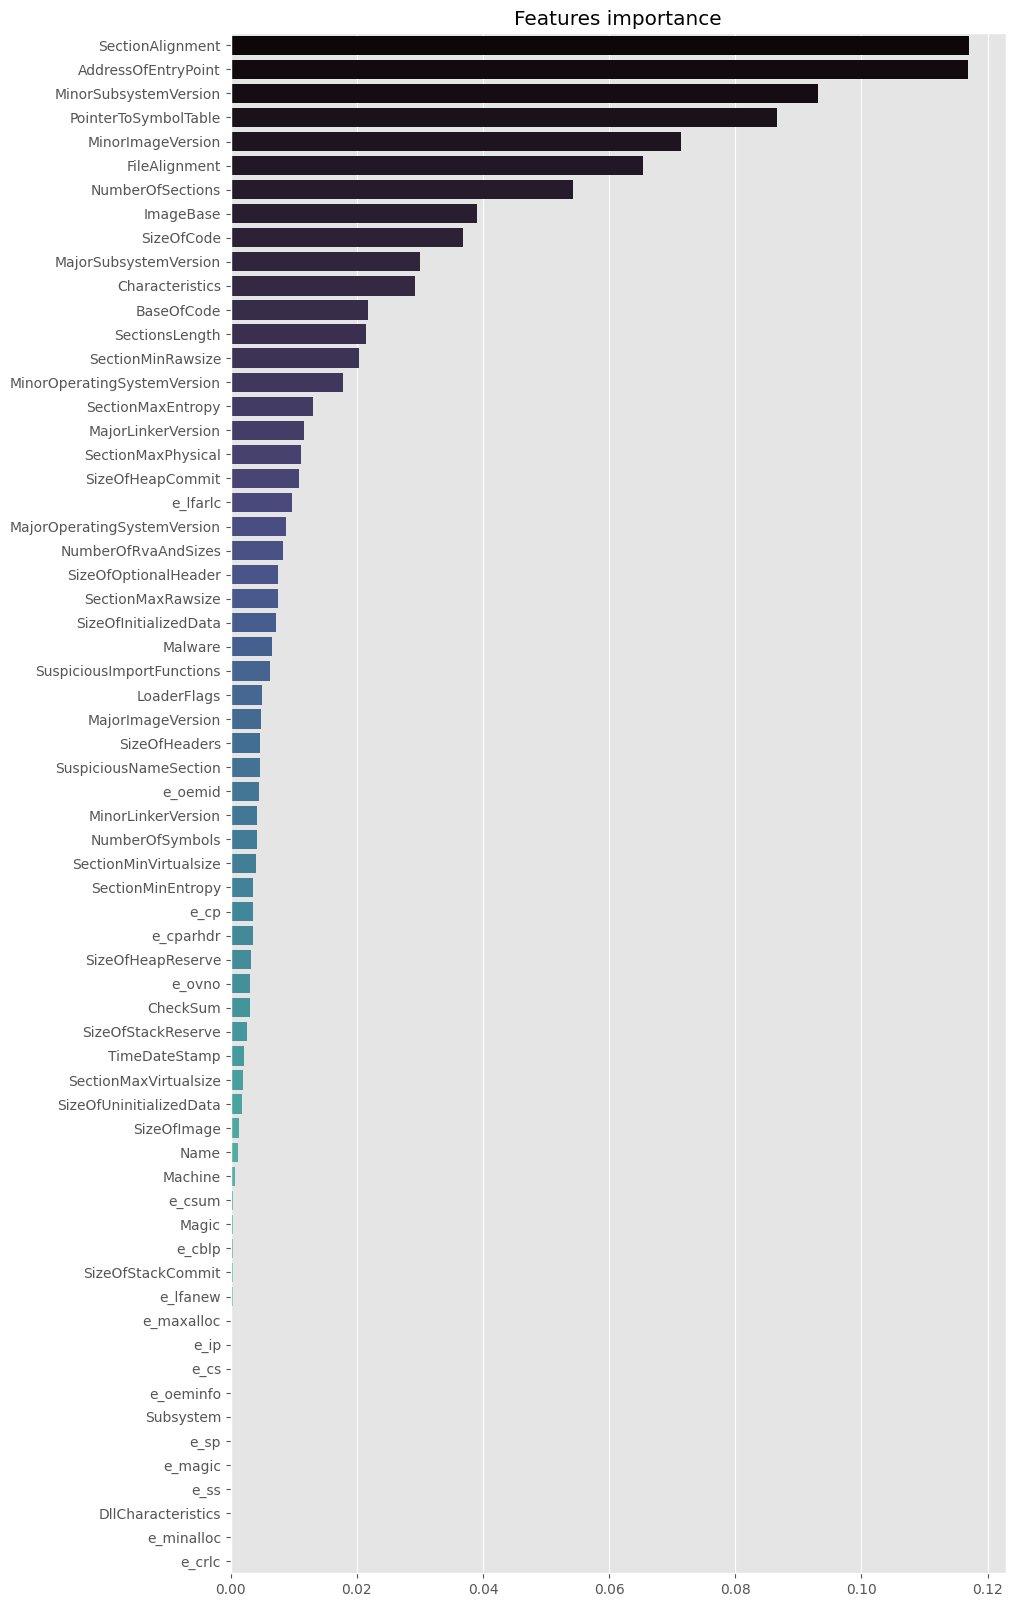

In [98]:
importance = rfc.feature_importances_
importance_dict = {data.columns.values[i]: importance[i] for i in range (len(importance))}
sorted_dict = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1])}
plt.figure(figsize=(10, 20))
sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], palette='mako')
plt.title('Features importance')

